In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Set the Tesseract executable path (replace with your Tesseract installation path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [26]:
input_image_path = cv2.imread('./New_Dem_final/test2.png')

# Define the scaling factor
scaling_factor = 0.7  # You can adjust this value as needed

# Calculate the new dimensions
new_width = int(input_image_path.shape[1] * scaling_factor)
new_height = int(input_image_path.shape[0] * scaling_factor)

# Resize the image using the new dimensions
scaled_image = cv2.resize(input_image_path, (new_width, new_height))

#grayscale the image
grayScale = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Graysacle', grayScale)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

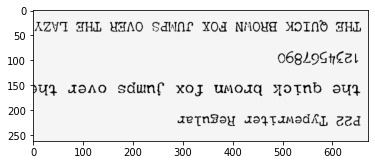

In [27]:
#Noise removal function
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

no_noise = noise_removal(grayScale)
# cv2.imwrite("preprocess/no_noise.jpg", no_noise)

plt.imshow(grayScale,'gray',vmin=0,vmax=255)
cv2.imshow('noiseReduction', no_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
#Thresholding
T, B1 = cv2.threshold(no_noise, thresh = 125, maxval = 255, type = cv2.THRESH_BINARY)

In [29]:
# Adaptive Threshold
B = cv2.adaptiveThreshold(no_noise, maxValue = 255,
                        adaptiveMethod = cv2. ADAPTIVE_THRESH_GAUSSIAN_C,
                         thresholdType = cv2.THRESH_BINARY,
                             blockSize = 5, C = 10)

In [30]:
cv2.imshow("threshold", B1)
cv2.imshow("Adpative thresholding", B)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [31]:
#Thicking the image //So far we don't using thicking
def Thicken(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
    
eroded_image = Thicken(B)

cv2.imshow('Thicking', eroded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [32]:
#Histogram
dst = cv2.equalizeHist(B)
cv2.imshow("Orig", scaled_image)
cv2.imshow("Equal Hist", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(-1)

-1

In [17]:
# cv2.imshow('Graysacle', grayScale)
# cv2.imshow('noiseReduction', no_noise)
# cv2.imshow("threshold", B1)
# cv2.imshow("Adpative thresholding", B)
# cv2.imshow('Eroded_image', eroded_image)
# cv2.imshow("Equal Hist", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(-1)

-1

In [33]:
#Making bounding box

# Use Tesseract to perform text recognition
text = pytesseract.image_to_string(grayScale)

# Get the text boxes and their coordinates
detection_boxes = pytesseract.image_to_boxes(grayScale)

# Loop through each detected box and draw a bounding box
for box in detection_boxes.splitlines():
    box = box.split()
    x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(B1, (x, y), (w, h), (0, 255, 0), 2)

    
# Display the text detected by Tesseract
print("Detected Text:")
print(text)

#Display the image with bounding boxes
cv2.imshow('Image with Bounding Boxes', grayScale)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detected Text:
AZVT SHL USAO SdNNf XOA NNOUM MOINS AHL
C68L9GHESL
yy JoAO sdunf xojJ umorzq yotnb ayy

zetnSoy sJoytumedAy, ged



In [34]:
#CALCULATING THE DISTANCE BETWEEN CHARACTERS
# Initialize a list to store distances between letters
letter_distances = []

# Loop through each detected box and calculate the distance between letters
for i in range(len(detection_boxes.splitlines()) - 1):
    box1 = detection_boxes.splitlines()[i].split()
    box2 = detection_boxes.splitlines()[i + 1].split()
    
    x1, y1 = int(box1[1]), int(box1[2])
    x2, y2 = int(box2[1]), int(box2[2])
    
    distance = x2 - x1
    letter_distances.append(distance)

    
print("Letter spacing: ", letter_distances)

Letter spacing:  [18, 16, 17, 33, 20, 14, 33, 21, 12, 19, 33, 17, 21, 12, 18, 32, 18, 16, 34, 17, 17, 16, 16, 34, 18, 17, 16, 16, 34, 17, 17, -151, 16, 18, 17, 17, 16, 18, 16, 17, 20, -646, 32, 39, 20, 19, 21, 40, 18, 20, 19, 21, 38, 19, 19, 11, 27, 20, 22, 18, 12, 8, 39, 21, 20, 18, 21, 39, 18, 21, -350, 16, 18, 16, 16, 19, 15, 34, 11, 7, 16, 17, 17, 15, 19, 16, 16, 17, 9, 25, 17, 17]


In [35]:
#With letter and boundary spacing
# Initialize a list to store distances between letters
letter_distances = []

distance_threshold = 5

# Loop through each detected box and calculate the distance between letters
for i in range(len(detection_boxes.splitlines()) - 1):
    box1 = detection_boxes.splitlines()[i].split()
    box2 = detection_boxes.splitlines()[i + 1].split()
    
    x1, y1 = int(box1[1]), int(box1[2])
    x2, y2 = int(box2[1]), int(box2[2])
    
    distance = x2 - x1
    letter_distances.append(distance)

# Combine text based on letter spacing
combined_text = ""
current_word = ""

for i in range(len(detection_boxes.splitlines())):
    box = detection_boxes.splitlines()[i].split()
    letter = text[i]

    if i == 0 or letter_distances[i - 1] > distance_threshold:
        combined_text += current_word + " " + letter
        current_word = ""
    else:
        current_word += letter

# Append the last word
combined_text += current_word


# Print the extracted text with letter spacing
print("Extracted Text with Letter Spacing:")
print(combined_text)

Extracted Text with Letter Spacing:
 A Z V T   S H L   U S A O   S d N N f   X O A   N N O U M   M OI N S   A H L 
 C 68 L 9 G H E S L 
 y y   J o A O   s d u n f   x o j J   um o r z q   y o t n b   a y y 
 
 z e t n S
